In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Load and view the dataset
train = pd.read_csv('data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#再頻出でnullを埋める
embarked_mode = train['Embarked'].mode()
# inplace=Trueを指定すると、元のオブジェクトが変更される
train['Embarked'].fillna(embarked_mode[0], inplace=True)
cabin_mode = train['Cabin'].mode()
train['Cabin'].fillna(cabin_mode[0], inplace=True)
# 中央値
age_median = train['Age'].median()
train['Age'].fillna(age_median, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test = pd.read_csv('data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test['Age'].fillna(age_median, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
print('Number of training examples: ', len(train))
print('Number of testing examples: ', len(test))
print('Number of attributes: ', len(test.columns))
print('Available attributes: ', test.columns)

Number of training examples:  891
Number of testing examples:  418
Number of attributes:  11
Available attributes:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'],  axis=1, inplace=True)
train.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


Age - min:  0.42  max:  80.0  mean:  29.36158249158249  median:  28.0  mode:  28.0  std:  13.019696550973201  range:  79.58


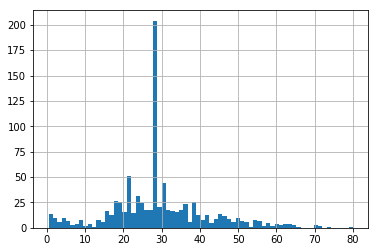

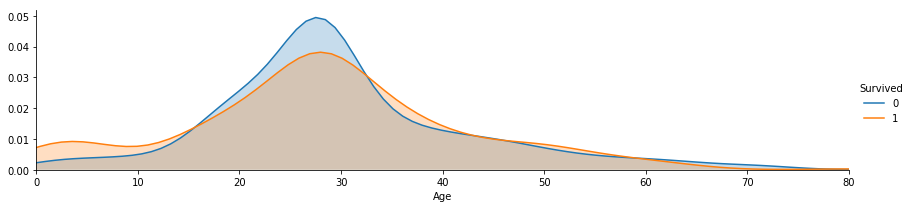

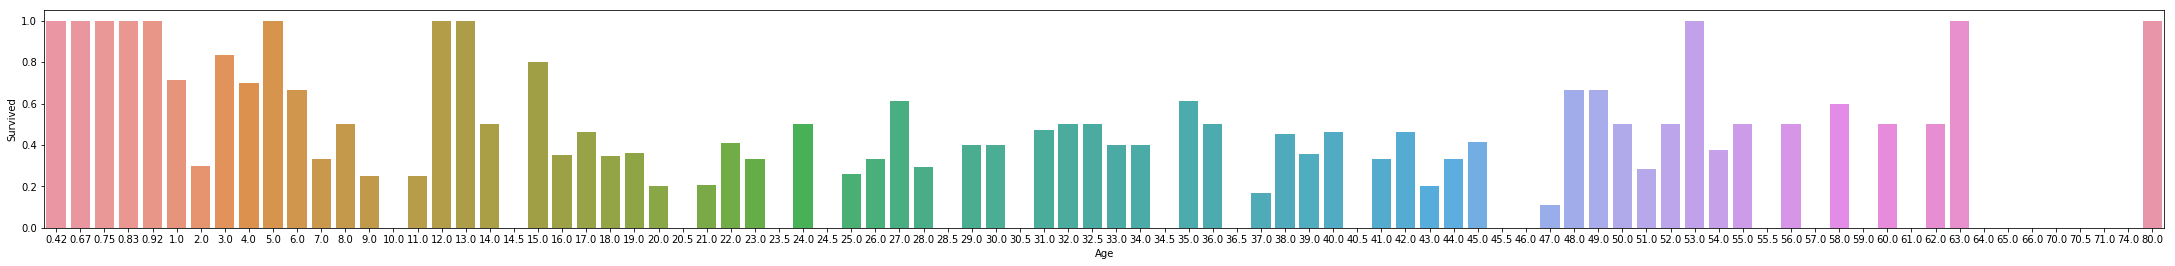

In [9]:
import seaborn as sns
train['Age'].hist(bins=70)
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1, 1, figsize=(38, 4))
average_age = train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

min_age = min(train['Age'])
max_age = max(train['Age'])
mean_age = train['Age'].mean()
median_age = train['Age'].median()
mode_age = train['Age'].mode()
std_age = train['Age'].std()
range_age = max_age - min_age
print('Age - min: ', min_age, ' max: ', max_age, ' mean: ', mean_age, ' median: ', median_age, ' mode: ', mode_age.values[0], ' std: ', std_age, ' range: ', range_age)

#sns.lmplot(x="Age", y="Survived",  data=train, y_jitter=.02, logistic=True)

ModuleNotFoundError: No module named 'statsmodels'

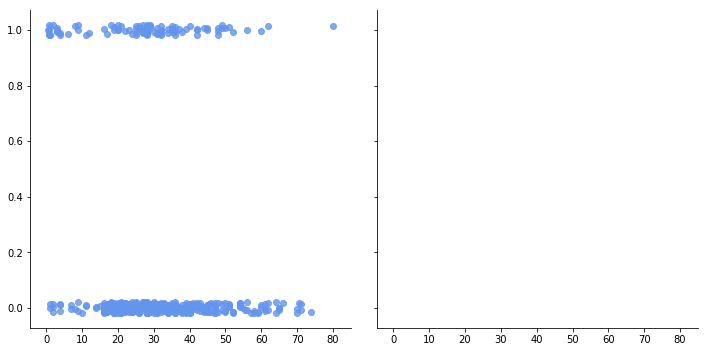

In [10]:
# Make a custom palette with gendered colors
pal = dict(male='#6495ED', female='#F08080')
g = sns.lmplot(x='Age', y='Survived', data=train, palette=pal, y_jitter=.02, logistic=True, hue='Sex', col='Sex')
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

In [ ]:
sns.factorplot('Embarked', 'Survived', data=train, size=4, aspect=3)
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=train, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=train, order=[1,0], ax=axis2)

embark_perc = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S', 'C', 'Q'], ax=axis3)



In [ ]:
embark_dummies_titanic = pd.get_dummies(train['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test = pd.get_dummies(test['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

train = train.join(embark_dummies_titanic)
test = test.join(embark_dummies_test)
train.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Embarked'], axis=1, inplace=True)


In [ ]:
train.info()
test.info()


In [ ]:
train['Family']  = train['Parch'] + train['SibSp']
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family']  = test['Parch'] + test['SibSp']
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

# drop Parch & SibSp
#　Familyにマージして使い終わったから
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)

# plot
fig, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.countplot(x='Family', data=train, order=[1,0],ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(['With Family', 'Alone'], rotation=0)



In [ ]:
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

train['Person'] = train[['Age', 'Sex']].apply(get_person, axis=1)
test['Person'] = test[['Age', 'Sex']].apply(get_person, axis=1)

#drop Sex
train.drop(['Sex'], axis=1, inplace= True)
test.drop(['Sex'], axis=1, inplace=True)
# create dummy variables for person column & drop male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(train['Person'])
person_dummies_titanic.columns = ['Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test = pd.get_dummies(test['Person'])
person_dummies_test.columns = ['Child', 'Female', 'Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train = train.join(person_dummies_titanic)
test = test.join(person_dummies_test)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='Person', data=train, ax=axis1)

person_perc = train[['Person', 'Survived']].groupby(['Person'], as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male', 'female', 'child'])

train.drop(['Person'], axis=1, inplace=True)
test.drop(['Person'], axis=1, inplace=True)

In [ ]:
sns.factorplot('Pclass', 'Survived', order=[1,2,3], data=train, size=5)

pclass_dummies_titanic = pd.get_dummies(train['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test= pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train.drop(['Pclass'], axis=1, inplace=True)
test.drop(['Pclass'], axis=1, inplace=True)

train = train.join(pclass_dummies_titanic)
test = test.join(pclass_dummies_test)


In [ ]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

# get fare for survived & didn't survive passengers
fare_not_survived = train['Fare'][train['Survived'] ==0]
fare_survived = train['Fare'][train['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

train['Fare'].plot(kind='hist', figsize=(15,3), bins=100, xlim=(0,50))
average_fare.index.names = std_fare.index.names = ['Survived']
average_fare.plot(yerr=std_fare, kind='bar', legend=False)


In [ ]:
train.info()
test.info()

In [ ]:
x_train = train.drop(['PassengerId', 'Survived'], axis=1).values.astype(np.float32)
n_examples = len(x_train)
print(train['Survived'].values.astype(np.int32).shape)
y_train = train['Survived'].values.reshape(n_examples, -1).astype(np.int32)
print(x_train.shape)
print(y_train.shape)
x_test = test.drop('PassengerId', axis=1).values.astype(np.float32)

from chainer.dataset import iterator
from chainer.iterators import SerialIterator
from chainer import Chain
from chainer.training import Trainer
from chainer.training import StandardUpdater
import numpy as np
import chainer.links as L
from chainer.optimizers import AdaGrad, SGD, MomentumSGD
from chainer.training.extensions import ProgressBar
from chainer.training.extensions import Evaluator, PrintReport, LogReport
import chainer.functions as F
from chainer import Variable
from chainer.optimizer import WeightDecay
from chainer.functions.loss import sigmoid_cross_entropy

class TitanicModel(Chain):
    def __init__(self):
        super(TitanicModel, self).__init__(lin=L.Linear(9, 1))
        
    def __call__(self, x):
        output = self.lin(x)
        return output
    
train_data = [(x_train[i,:], y_train[i]) for i in range(n_examples)]
train_iter = SerialIterator(train_data, batch_size = n_examples, repeat=True, shuffle=True)
valid_iter = SerialIterator(train_data, batch_size = 1, repeat=False, shuffle=False)
titanic_model = TitanicModel()
model = L.Classifier(titanic_model, lossfun=sigmoid_cross_entropy.sigmoid_cross_entropy)
model.compute_accuracy = False
opt = MomentumSGD(lr=0.001)
opt.use_cleargrads()
opt.setup(model)
opt.add_hook(WeightDecay(0.0))
updater = StandardUpdater(train_iter, opt, device=-1)
trainer = Trainer(updater, (12000, 'epoch'))
evaluator = Evaluator(valid_iter, model)

trainer.run()

In [ ]:
test_pred = F.sigmoid(titanic_model(x_test)).data
test_pred = (test_pred.reshape(len(x_test),) > 0.5).astype(np.int32)
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred
})
submission.to_csv('titanic.csv', index=False)